# For hateful meme detection we need to extract text from the meme. we are using keras-ocr for text extraction. keras-ocr returns each word in the text along with the coordinates of the four corners of the bounding box of the word. But the words are not in sequence as they appear in the text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
path='/content/drive/MyDrive/text_extraction_from_img'
print(path)

/content/drive/MyDrive/text_extraction_from_img


In [ ]:
!pip install keras_ocr

# !wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
# !unzip A3DS.zip

!pip install transformers

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import os
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## The bounding boxes for words in the text are detected

In [ ]:
img_file_name='23058.png'
img = keras_ocr.tools.read(os.path.join(path,img_file_name))
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])

1/1 [==============================] - 5s 5s/step


# The words detected but not in sequence

In [ ]:
for i in range(len(prediction_groups[0])):
  print(prediction_groups[0][i][0])

it
afraid
be
iove
don
to
again
is
like
not
everyone
your
ex


# First sort the words accoring to y-axis co-ordinates, considering the left top corner of the bounding box. 

In [ ]:
lst=[]
for i in range(len(prediction_groups[0])):
    lst.append(list(prediction_groups[0][i][1][0]))
lst=np.array(lst)
print(lst)

idx=lst[:,1].argsort()
lst=lst[idx]

# lst=np.sort(lst,axis=0)
print('\n\nSorted list\n',lst)


[[236.        19.      ]
 [329.46616   19.500574]
 [270.64996   18.101917]
 [513.60864   18.21946 ]
 [157.40619   19.220903]
 [463.        20.      ]
 [307.27573   91.53284 ]
 [379.       383.      ]
 [519.2259   382.0943  ]
 [433.3928   386.2149  ]
 [147.82661  389.05356 ]
 [269.62463  467.09854 ]
 [389.       466.      ]]


Sorted list
 [[270.64996   18.101917]
 [513.60864   18.21946 ]
 [236.        19.      ]
 [157.40619   19.220903]
 [329.46616   19.500574]
 [463.        20.      ]
 [307.27573   91.53284 ]
 [519.2259   382.0943  ]
 [379.       383.      ]
 [433.3928   386.2149  ]
 [147.82661  389.05356 ]
 [389.       466.      ]
 [269.62463  467.09854 ]]


# same y-value has been assigned to all words in a line using a threshold 

In [ ]:
array1=[]
array2=[]
for i in range(len(lst)-1):
  if (lst[i+1][1]-lst[i][1])<=20:
    lst[i+1][1]=lst[i][1]
   
    
print(lst)

len(lst)

[[270.64996   18.101917]
 [513.60864   18.101917]
 [236.        18.101917]
 [157.40619   18.101917]
 [329.46616   18.101917]
 [463.        18.101917]
 [307.27573   91.53284 ]
 [519.2259   382.0943  ]
 [379.       382.0943  ]
 [433.3928   382.0943  ]
 [147.82661  382.0943  ]
 [389.       466.      ]
 [269.62463  466.      ]]


13

# words of each line is seperated as different array elements and sorted according to x-axis coordinates. Lower value of x means that word appears before.

In [ ]:

array=[]
final_array=[]
for i in range(len(lst)-1):
  if lst[i][1]==lst[i+1][1]:
    
    array.append(lst[i])

  else:
    array.append(lst[i])
    final_array.append(array)
    array=[]
   
array.append(lst[i+1])  
final_array.append(array)  
final_array

[[array([270.64996 ,  18.101917], dtype=float32),
  array([513.60864 ,  18.101917], dtype=float32),
  array([236.      ,  18.101917], dtype=float32),
  array([157.40619 ,  18.101917], dtype=float32),
  array([329.46616 ,  18.101917], dtype=float32),
  array([463.      ,  18.101917], dtype=float32)],
 [array([307.27573,  91.53284], dtype=float32)],
 [array([519.2259, 382.0943], dtype=float32),
  array([379.    , 382.0943], dtype=float32),
  array([433.3928, 382.0943], dtype=float32),
  array([147.82661, 382.0943 ], dtype=float32)],
 [array([389., 466.], dtype=float32),
  array([269.62463, 466.     ], dtype=float32)]]

In [ ]:
for i in range(len(final_array)):

  final_array[i]=np.array(final_array[i])
  final_array[i].sort(axis=0)
  arr=[]
for i in range(len(final_array)):
  for j in range(len(final_array[i])):
    arr.append(final_array[i][j])
arr=np.array(arr)
print(arr)

[[157.40619   18.101917]
 [236.        18.101917]
 [270.64996   18.101917]
 [329.46616   18.101917]
 [463.        18.101917]
 [513.60864   18.101917]
 [307.27573   91.53284 ]
 [147.82661  382.0943  ]
 [379.       382.0943  ]
 [433.3928   382.0943  ]
 [519.2259   382.0943  ]
 [269.62463  466.      ]
 [389.       466.      ]]


# meme with detected bounding boxes of text

<Axes: >

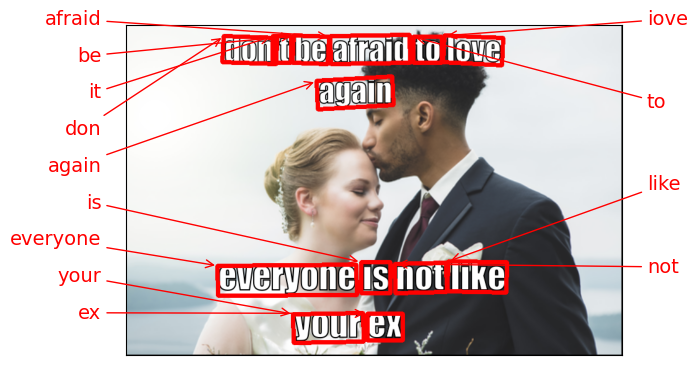

In [ ]:
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

# Finally get the text in sequence as on the meme

In [ ]:
string=''
for i in range(len(prediction_groups[0])):
    for j in range(len(prediction_groups[0])):
        if arr[i,0]==prediction_groups[0][j][1][0][0]:
            s=j
            break

    a=(prediction_groups[0][s][0])
    string=string+' '+a

print(string)


 don it be afraid to iove again everyone is not like your ex
